In [1]:
%pylab inline

import spacy
import pandas as pd
import string
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.dates as mdates

# I'll use Spacy for a matter of convinience 
nlp = spacy.load('pt_core_news_sm')
stoplist = spacy.lang.pt.stop_words.STOP_WORDS
punctuations = string.punctuation

# Date Ranges for graphs
years = mdates.YearLocator()
months = mdates.MonthLocator()
yearsFmt = mdates.DateFormatter('%Y-%m')

# Let's using Nate's Silver 538 style for graphs
plt.style.use('fivethirtyeight')

# Load data from local environment
df_extracted_essays = pd.read_csv('df_extracted_essays.csv')

# Basic information about the files
print(f'Qty Articles: {df_extracted_essays.shape[0]}')
print(f'Qty Distinct Authors: {len(df_extracted_essays.author.unique())}')

Populating the interactive namespace from numpy and matplotlib
Qty Articles: 2855
Qty Distinct Authors: 495


In [2]:
# Initial check to see the data
df_extracted_essays.head(20)

,author,url,date_transform,date,text_processed
0,Jeffrey Tucker,https://mises.org.br/Article.aspx?id=17,"['', '24', 'jan', '2008']",2008-01-24,propriedade intelectual chave sucesso maiores ...
1,Walter Block,https://mises.org.br/Article.aspx?id=19,"['', '30', 'jan', '2008']",2008-01-30,economista feliz right 0 0 height 44 320 cente...
2,Christopher Westley,https://mises.org.br/Article.aspx?id=22,"['', '30', 'jan', '2008']",2008-01-30,loucuras fiscais chegamos anos gastanca inflac...
3,Ron Paul,https://mises.org.br/Article.aspx?id=23,"['', '30', 'jan', '2008']",2008-01-30,crise imobiliaria politica monetaria federal r...
4,Jim Bradley,https://mises.org.br/Article.aspx?id=24,"['', '30', 'jan', '2008']",2008-01-30,culpem emprestadores subprime atual retorica c...
5,Lew Rockwell,https://mises.org.br/Article.aspx?id=25,"['', '30', 'jan', '2008']",2008-01-30,contratos governamentais versus negocios verda...
6,Jeffrey Tucker,https://mises.org.br/Article.aspx?id=26,"['', '30', 'jan', '2008']",2008-01-30,quao livre livre mercado consegue perceber err...
7,Gary Danelishen,https://mises.org.br/Article.aspx?id=27,"['', '30', 'jan', '2008']",2008-01-30,economia austriaca vs economia bernanke econom...
8,Ron Paul,https://mises.org.br/Article.aspx?id=28,"['', '30', 'jan', '2008']",2008-01-30,colapso enron perante comite servicos financei...
9,Art Carden,https://mises.org.br/Article.aspx?id=30,"['', '30', 'jan', '2008']",2008-01-30,expansao credito investimentos improdutivos co...


In [3]:
# A single text example
df_extracted_essays['text_processed'].iloc[1000]

'guatemala privatizacao acordo ideia dominante epoca perfeitamente entregar servico monopolistico poucas empresas resultados fossem exatamente iguais ocorreriam livre mercado alta qualidade precos baixos bastava governo criar agencias reguladoras seriam geridas burocratas preocupados bemestar populacao saberiam perfeitamente estipular precos servicos impor metas empresas finalmente havia sido descoberta maneira obter resultados livre mercado mercado totalmente controlado planejado seja governo retirou setor continuou praticando controle precos melhor estilo sovietico passou determinar objetivos serem cumpridos caso setor telefonico brasileiro servicos melhoraram base comparacao pessima tinha pior telebras sido feito resposta guatemala possui setor telecomunicacoes totalmente desregulamentado consequentemente otimos servicos precos irrisorios historia inicial simples praticamente identica brasil termos proporcionais 1995 havia 11 milhoes habitantes pais 289 linhas telefonicas presidente

### Basic graphs to check posting along the time

In [4]:
# Article per date
df_article_per_date = pd.DataFrame(df_extracted_essays.groupby(['date']).size()).reset_index()
df_article_per_date.columns = ['date', 'qty']
df_article_per_date['roll_sum'] = df_article_per_date['qty'].cumsum()
df_article_per_date['date'] = pd.to_datetime(df_article_per_date['date'])

# Indexing the date field for graph it smoothly
df_article_per_date.set_index('date', inplace=True)

### Some time milestones 

In [5]:
# We're gonna to built some functions with some date milestones
# regarding the Brazilian Politics and some internal 
# events inside the Institute
def get_elections_2010():
    # Periodo Eleitoral - 2010
    # Ref: http://g1.globo.com/especiais/eleicoes-2010/noticia/2010/05/confira-o-calendario-eleitoral-de-2010.html
    plt.axvline(x=pd.to_datetime('2010-07-06'), color='chocolate', linestyle=':', label='Periodo Eleitoral')        
    plt.axvline(x=pd.to_datetime('2010-10-31'), color='chocolate', linestyle=':')

    
def get_elections_2014():    
    # Periodo Eleitoral - 2014
    # Ref: http://g1.globo.com/politica/eleicoes/2014/noticia/2014/05/confira-principais-datas-do-calendario-oficial-das-eleicoes-2014.html
    plt.axvline(x=pd.to_datetime('2014-07-06'), color='chocolate', linestyle=':', label='Periodo Eleitoral')        
    plt.axvline(x=pd.to_datetime('2014-10-26'), color='chocolate', linestyle=':')        

    
def get_elections_2018():    
    # Periodo Eleitoral - 2018
    # Ref: http://www.tse.jus.br/imprensa/noticias-tse/2017/Dezembro/confira-as-principais-datas-do-calendario-eleitoral-das-eleicoes-gerais-de-2018
    plt.axvline(x=pd.to_datetime('2018-07-05'), color='chocolate', linestyle=':', label='Periodo Eleitoral')        
    plt.axvline(x=pd.to_datetime('2018-10-28'), color='chocolate', linestyle=':')    

    
def get_impeachment():    
    # Impeachment Pres. Dilma Roussef
    # Ref: https://pt.wikipedia.org/wiki/Impeachment_de_Dilma_Rousseff
    plt.axvline(x=pd.to_datetime('2015-12-02'), color='cyan', linestyle=':', label='Impeachment')
    plt.axvline(x=pd.to_datetime('2016-08-31'), color='cyan', linestyle=':')        

    
def get_chiocca_brothers_exit():
    # Chiocca Brothers Exit
    # Ref: http://rothbardbrasil.com/nota-sobre-a-saida-de-helio-beltrao-do-imb/
    plt.axvline(x=pd.to_datetime('2015-08-27'), color='red', linestyle=':', label='Chiocca Brothers Exit')

    
def get_helio_folha():    
    # Helio Beltrao na Folha
    # Ref: https://www1.folha.uol.com.br/colunas/helio-beltrao/2019/04/anarcocapitalismo-o-ideal-desconhecido.shtml
    plt.axvline(x=pd.to_datetime('2019-04-17'), color='lightgray', linestyle=':', label='Helio @ FSP')

    
def get_all_milestone_events():
    # Just a small wrapper to get all functions and display
    get_elections_2010()
    get_elections_2014()
    get_elections_2018()
    get_impeachment()
    get_chiocca_brothers_exit()
    get_helio_folha()
    plt.legend(loc=0)

In [6]:
def get_all_articles_timeline(df, column):
    # Graph to display all articles
    fig, ax = plt.subplots(figsize=(20,10))
    ax.xaxis.set_major_locator(mdates.YearLocator())
    df[column].plot(ax=ax)
    get_all_milestone_events()

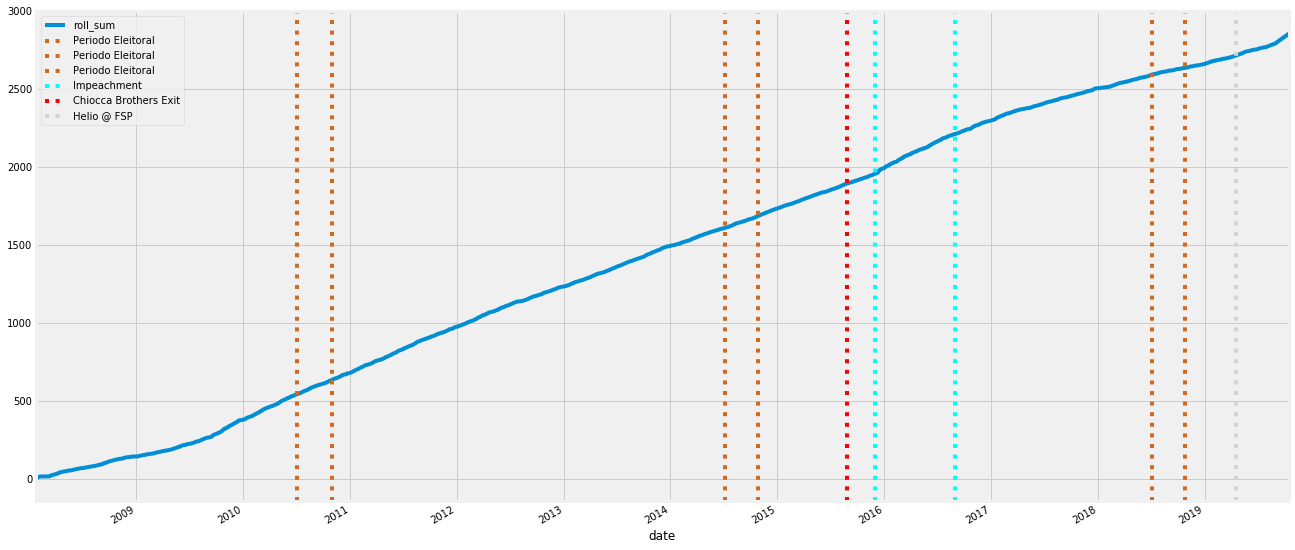

In [7]:
get_all_articles_timeline(df_article_per_date, 'roll_sum')

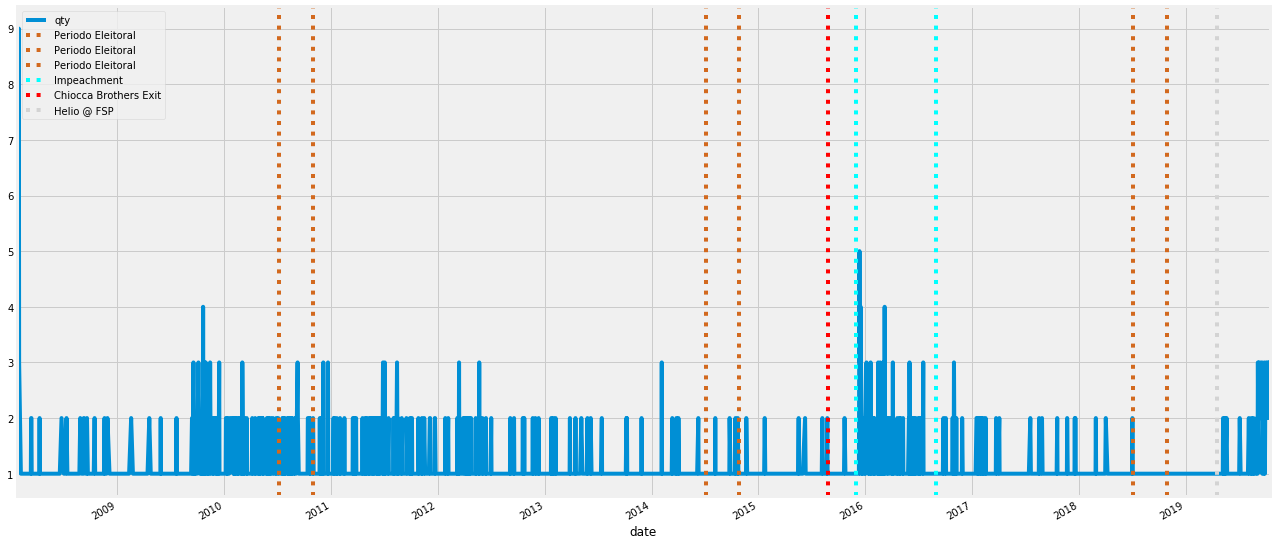

In [8]:
get_all_articles_timeline(df_article_per_date, 'qty')

### Cumulative info and frequency along the time
#### Rolling Sum

In [9]:
def get_date_range_data(df, metric, start_date, end_date):
    # Graphs with a timespan
    fig, ax = plt.subplots(figsize=(20,10))
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(yearsFmt)
    df_article_per_date.loc[start_date:end_date][metric].plot(ax=ax)

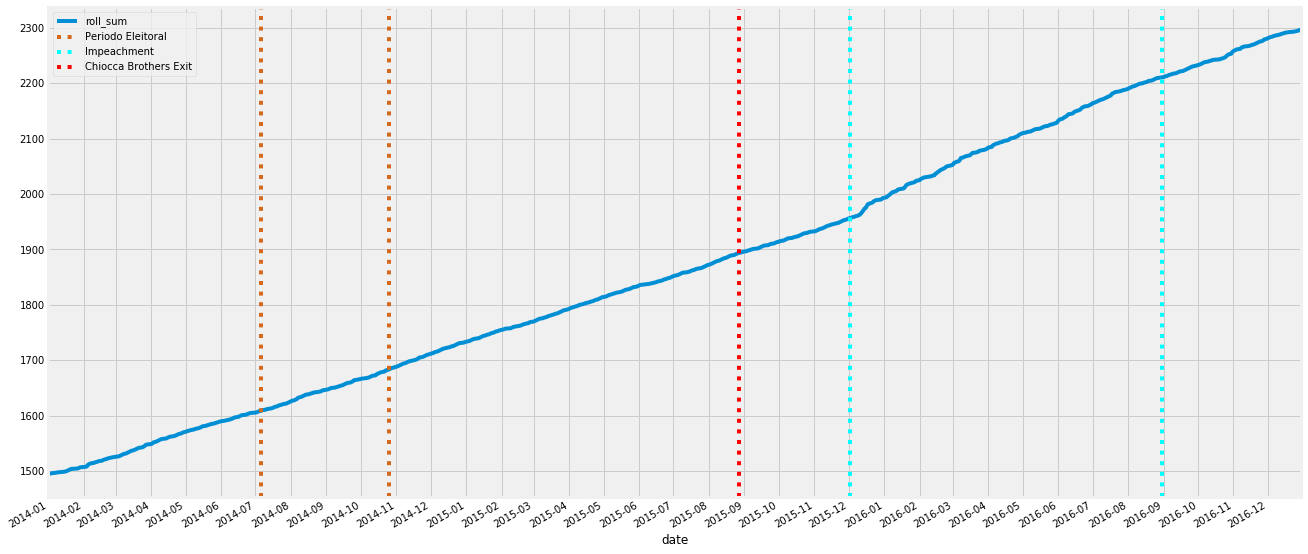

In [10]:
get_date_range_data(df_article_per_date, 'roll_sum', '20140101', '20161231')    
get_elections_2014()
get_impeachment()
get_chiocca_brothers_exit()
plt.legend(loc=0)

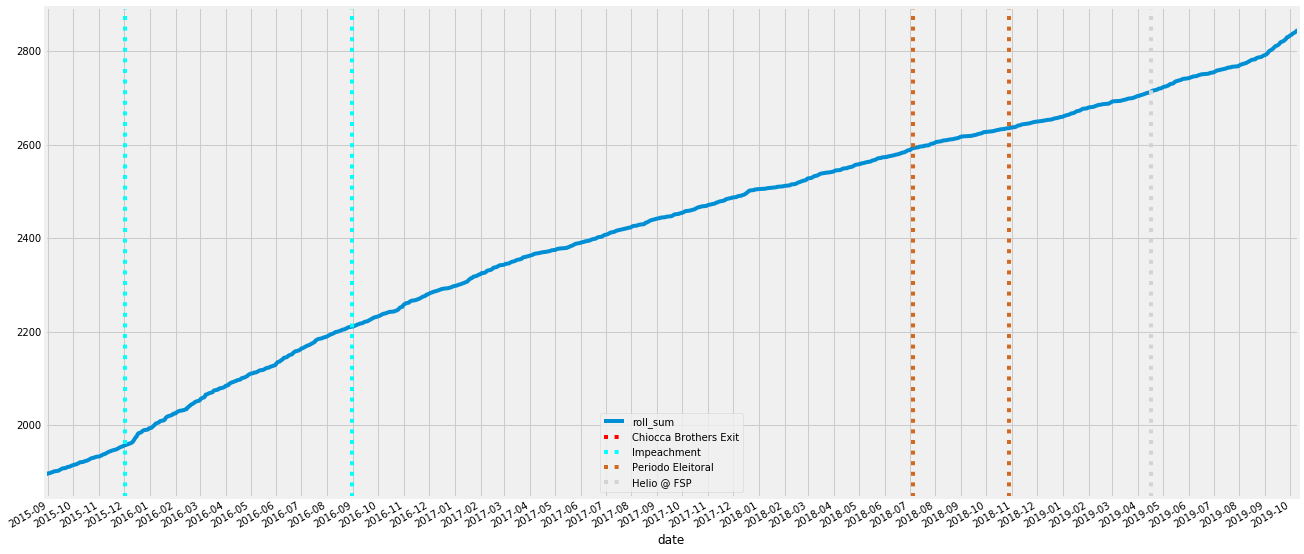

In [11]:
get_date_range_data(df_article_per_date, 'roll_sum', '20150827', '20191010')
get_chiocca_brothers_exit()
get_impeachment()
get_elections_2018()
get_helio_folha()
plt.legend(loc=0)

### Cumulative info and frequency along the time
#### Frequency

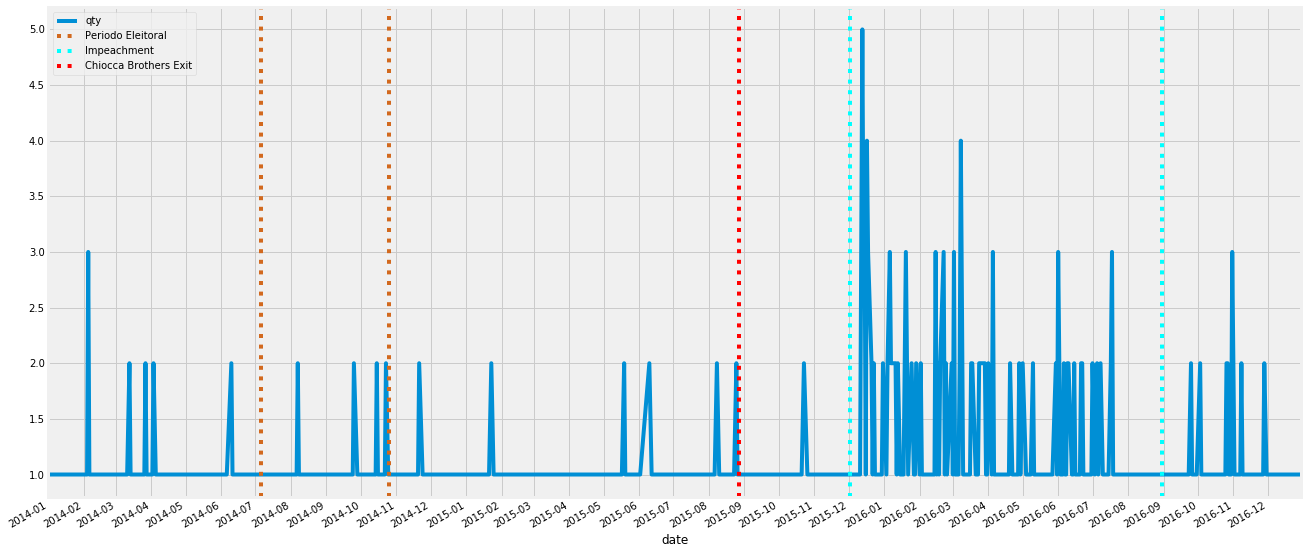

In [12]:
get_date_range_data(df_article_per_date, 'qty', '20140101', '20161231')
get_elections_2014()
get_impeachment()
get_chiocca_brothers_exit()
plt.legend(loc=0)

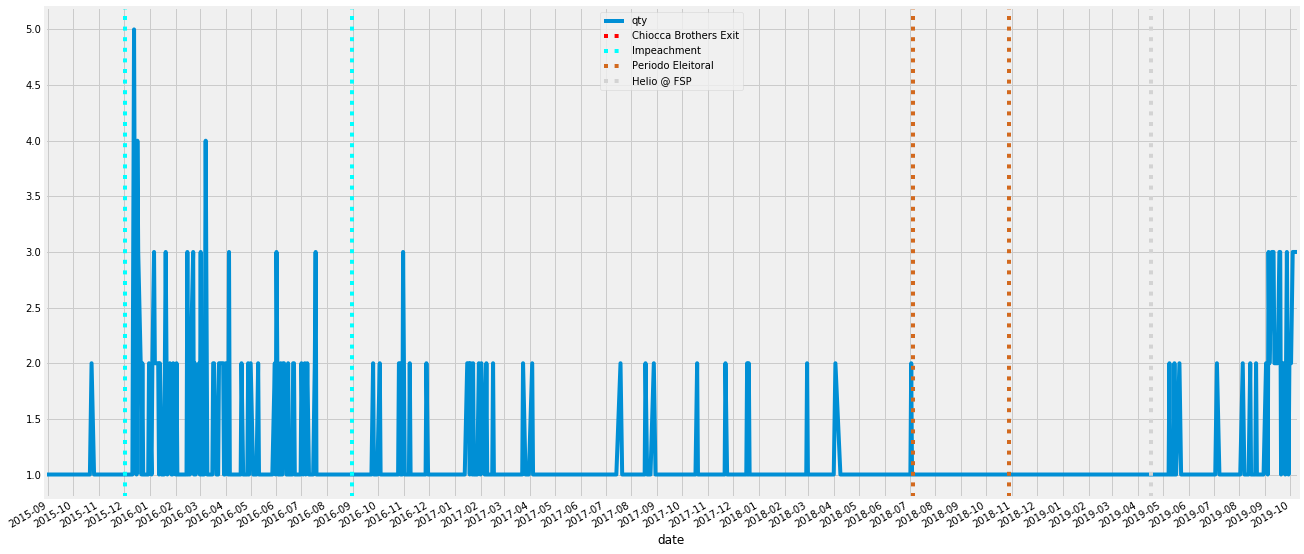

In [13]:
get_date_range_data(df_article_per_date, 'qty', '20150827', '20191010')
get_chiocca_brothers_exit()
get_impeachment()
get_elections_2018()
get_helio_folha()
plt.legend(loc=0)

### Rolling Averages

In [14]:
# Some graphs with rolling average
date_range = df_article_per_date.index


def get_graph_ts(ts, window, label):
    plt.figure(figsize=(20,10))
    plt.plot(date_range, ts.rolling(window=window, center=False).mean(), label=label);
    plt.title(f'Articles in Mises Brasil (Rolling Average - window={window})')
    plt.xlabel('Years')
    plt.ylabel('# Articles')
    plt.legend()

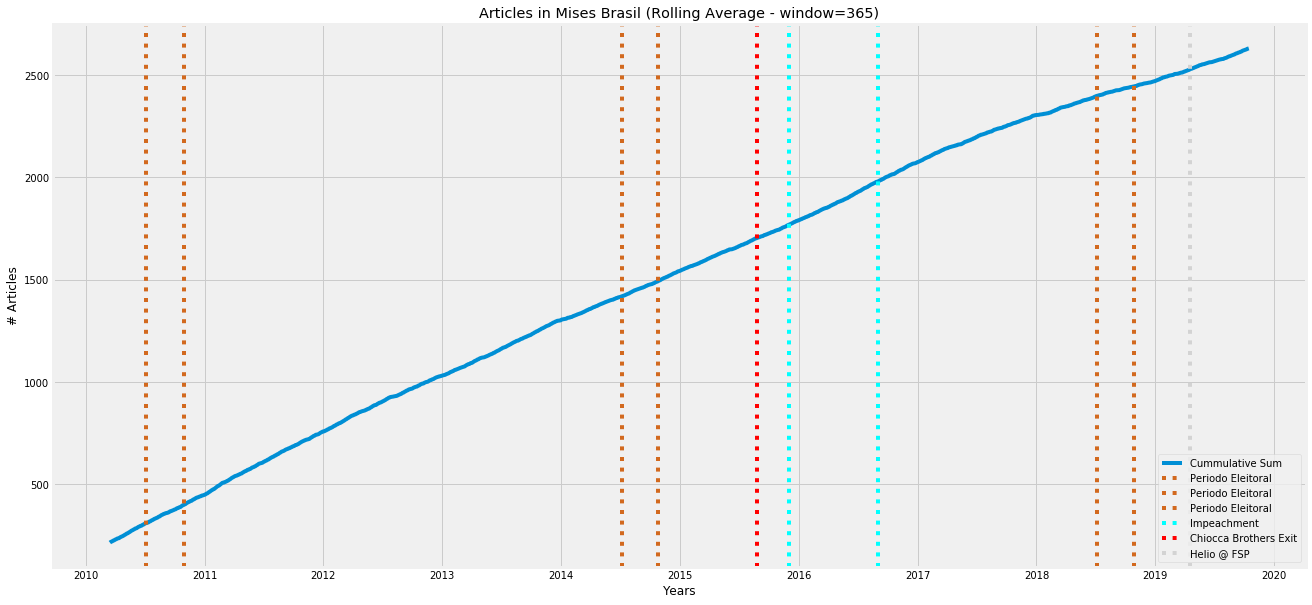

In [15]:
get_graph_ts(df_article_per_date['roll_sum'], 365, 'Cummulative Sum')
get_all_milestone_events()

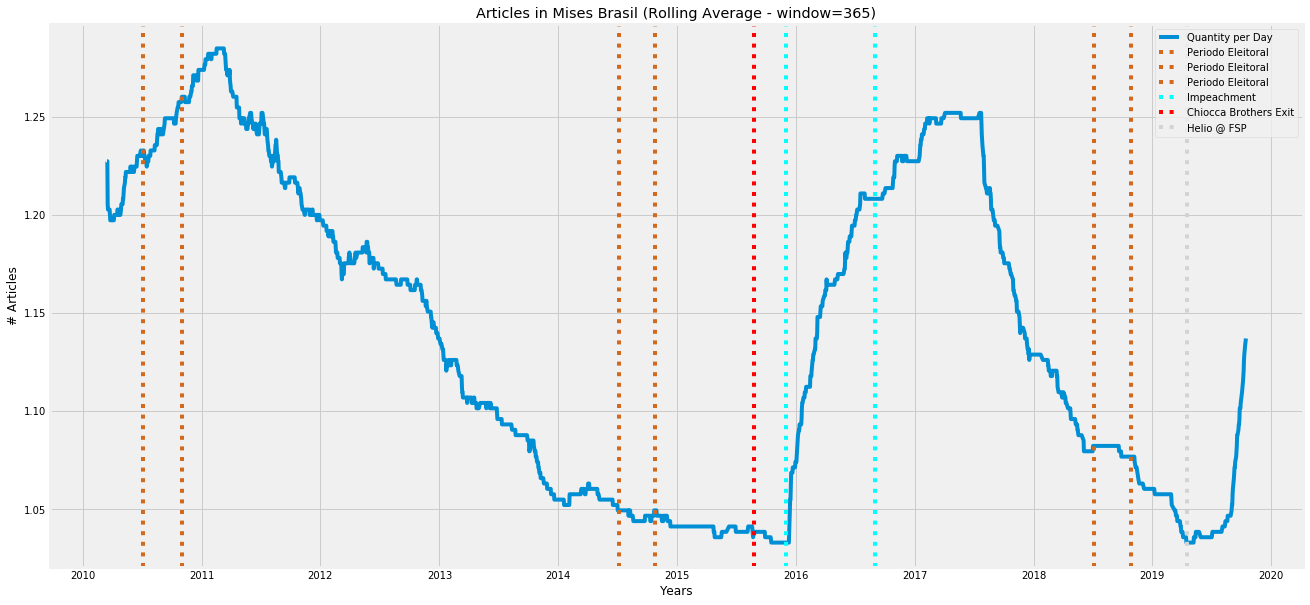

In [16]:
get_graph_ts(df_article_per_date['qty'], 365, 'Quantity per Day')
get_all_milestone_events()

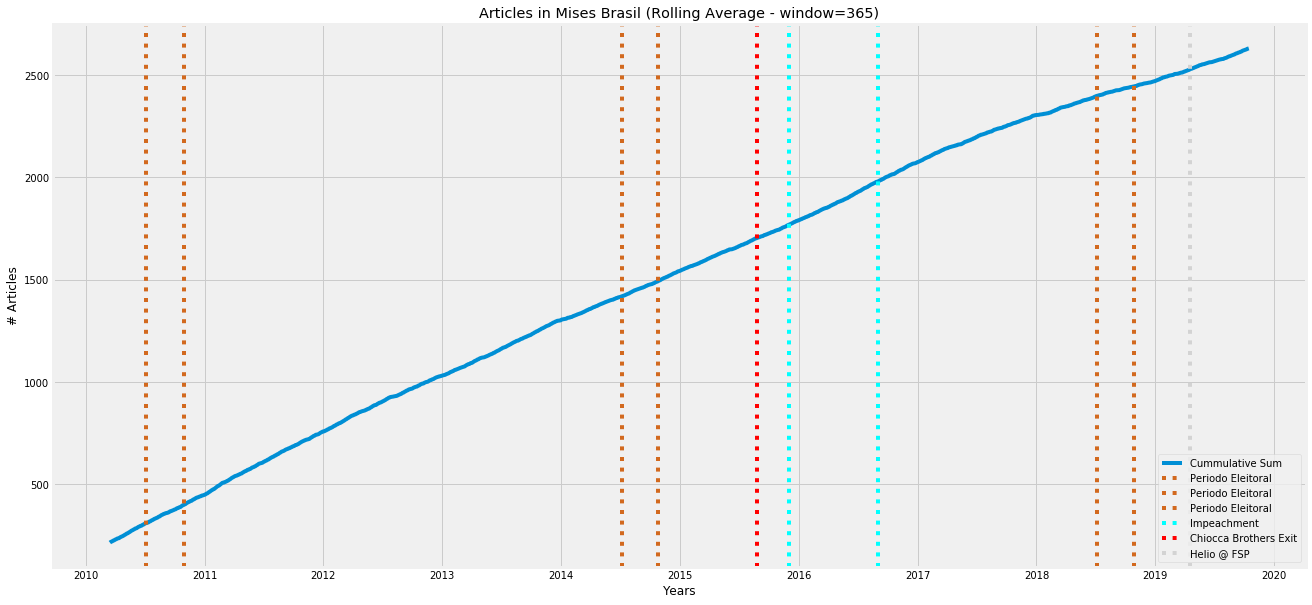

In [17]:
get_graph_ts(df_article_per_date['roll_sum'], 365, 'Cummulative Sum')
get_all_milestone_events()

### Time Series decomposition

In [18]:
def get_decomposition(df_series_column, freq, model):
    """
    Additive or multiplicative?
    
    [1] - we use multiplicative models when the magnitude 
    of the seasonal pattern in the data depends on the magnitude 
    of the data. On other hand, in the additive model, 
    the magnitude of seasonality does not change in relation to time.

    [2] - The additive decomposition is the most appropriate 
    if the magnitude of the seasonal fluctuations, or the 
    variation around the trend-cycle, does not vary 
    with the level of the time series. When the variation 
    in the seasonal pattern, or the variation around the 
    trend-cycle, appears to be proportional to the level 
    of the time series, then a multiplicative decomposition
    is more appropriate. Multiplicative decompositions 
    are common with economic time series.

    [3] - The models that we have considered in earlier 
    sections have been additive models, and there has
    been an implicit assumption that the different components 
    affected the time series additively. For monthly data, 
    an additive model assumes that the difference between 
    the January and July values is approximately the 
    same each year. In other words, the amplitude of the
    seasonal effect is the same each year. v

    References
    [1] - Seasonality in Python: additive or multiplicative model?
    Link: https://medium.com/@sigmundojr/seasonality-in-python-additive-or-multiplicative-model-d4b9cf1f48a7

    [2] - Forecasting: Principles and Practice 
    Link: https://otexts.com/fpp2/components.html

    [3] - http://www-ist.massey.ac.nz/dstirlin/CAST/CAST/Hmultiplicative/multiplicative1.html
    
    """
    pylab.rcParams['figure.figsize'] = (20,10)
    res = sm.tsa.seasonal_decompose(df_series_column, freq=freq, model=model)
    return res

In [19]:
def plot_season_and_residual(decompose_result):
    # Just plot seasonal and residual in a 
    # decomposition plots
    fig, ax = plt.subplots(figsize=(20,10))

    yearsFmt = mdates.DateFormatter('%Y')

    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(yearsFmt)

    plt.subplot(2, 1, 1)
    plt.plot(decompose_result.seasonal)
    get_all_milestone_events()

    plt.subplot(2, 1, 2)
    plt.plot(decompose_result.resid)
    get_all_milestone_events()

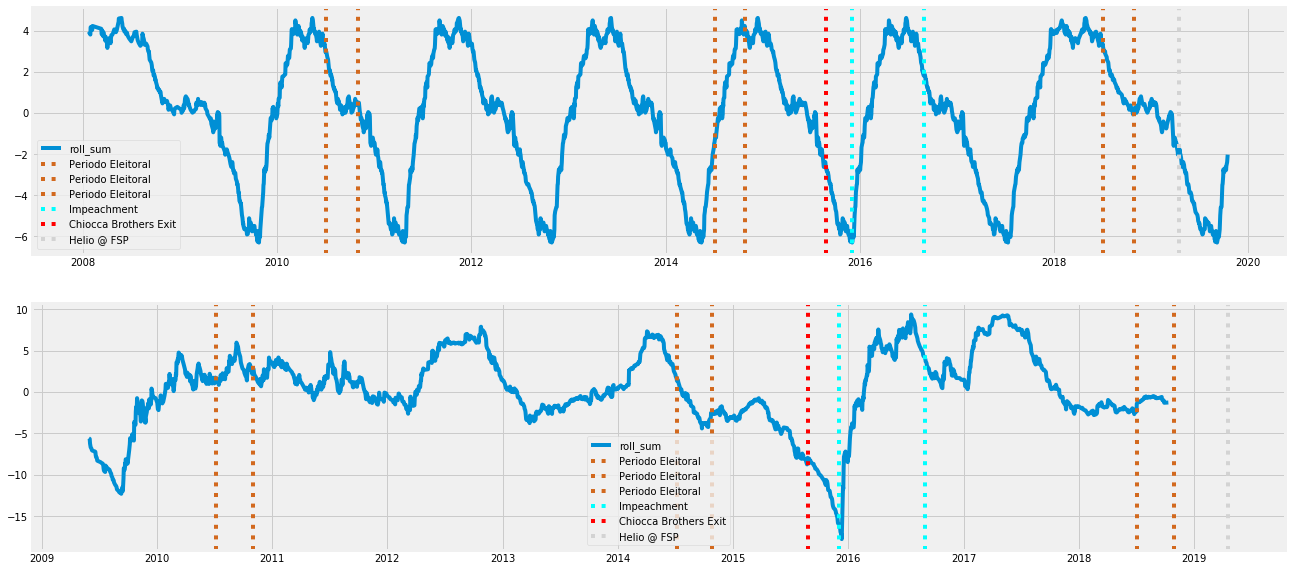

In [20]:
res = get_decomposition(df_article_per_date['roll_sum'], freq=365, model='additive')
plot_season_and_residual(res)

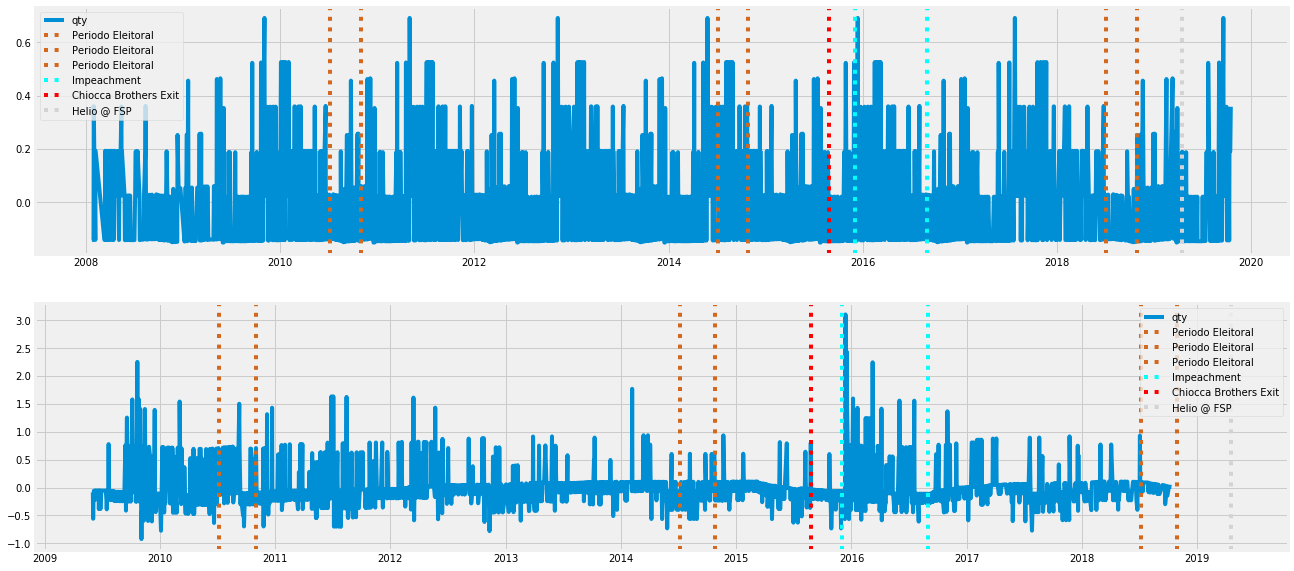

In [21]:
res = get_decomposition(df_article_per_date['qty'], freq=365, model='additive')
plot_season_and_residual(res)

### Small look in the authors

In [22]:
# Article per date in Time Series
df_article_per_date = pd.DataFrame(df_extracted_essays.groupby(['author','date']).size()).reset_index()
df_article_per_date.columns = ['author', 'date', 'qty']
df_article_per_date['date'] = pd.to_datetime(df_article_per_date['date'])

# Get only the Top 20 most profilic authors
df_essay_authors = df_extracted_essays.groupby(['author']).size().reset_index()
df_essay_authors.columns =['author', 'qty']
df_top_authors = df_essay_authors.sort_values(by=['qty'], ascending=False).head(20)

In [23]:
# Generate a time series object along the time
df_author_ts = pd.DataFrame()

for author in df_top_authors['author'].unique():
    df = df_article_per_date[df_article_per_date['author'] == author].copy(deep=True)
    df['cumsum'] = df_article_per_date[df_article_per_date['author'] == author]['qty'].cumsum()
    df_author_ts = df_author_ts.append(df)
    
df_author_ts.set_index('date', inplace=True)    

In [24]:
def get_color_cycler():
    # Just a small wrapper to distinguish the series
    # This is a little "hackish" because the matplotlib
    # and 538 theme has some limitations in the pallete 
    # color. Here R + ggplot it's way superior
    from cycler import cycler
    default_cycler = (cycler(color=[
                        'b',
                        'g',
                        'r',
                        'c',
                        'm',
                        'y',
                        'k',
                        'c',
                        'b',
                        'g',
                        'r',
                        'c',
                        'm',
                        'y',
                        'k',
                        'r',
                        'b',
                        'g',
                        'r',
                        'c',
                        'm',
                        'y',
                        'k',
                        'g',
                        'k',
                        'b',        
    ]) +
                      cycler(linestyle=[
                          '-',
                          '--',
                          ':',
                          '-.',
                          '-.',
                          ':',
                          '--',
                          '-',
                          '-',
                          '--',
                          ':',
                          '-.',
                          '-.',
                          ':',
                          '--',
                          '-',
                          '-',
                          '--',
                          ':',
                          '-.',
                          '-.',
                          ':',
                          '--',
                          '-',
                          '-',
                          '--',
                      ]))

    plt.rc('lines', linewidth=4)
    plt.rc('axes', prop_cycle=default_cycler)

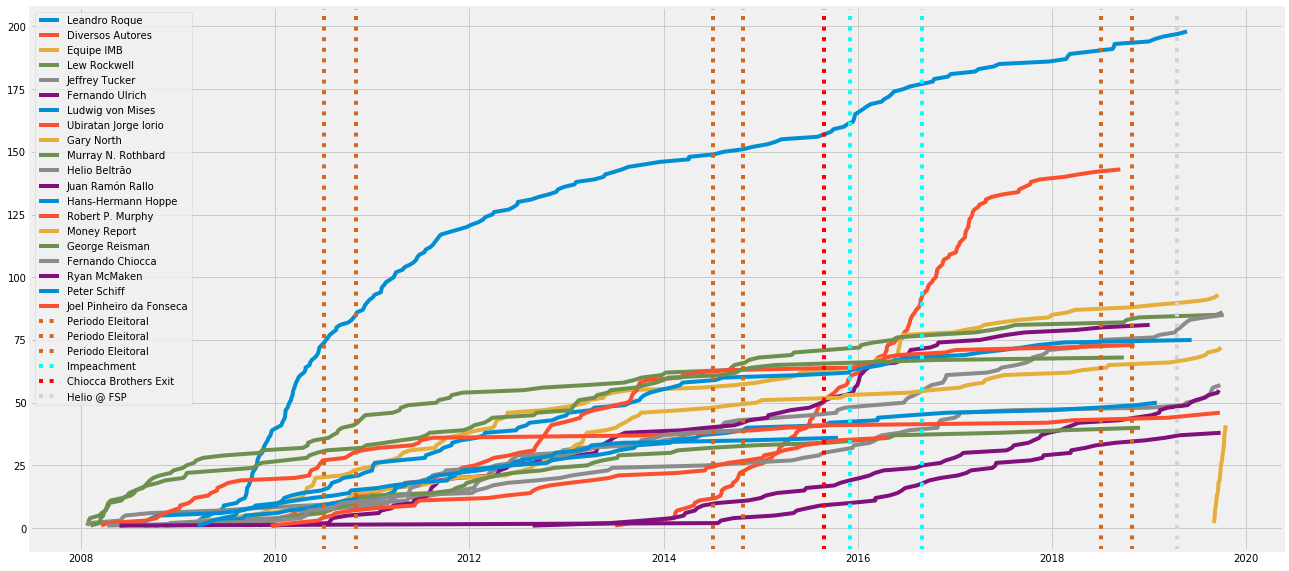

In [25]:
def get_authors_all_timeline(authors_list):
    # Full plot
    matplotlib.rc('figure', figsize=(20,10))
    for author in authors_list:
        df = df_author_ts[df_author_ts['author'] == author]
        df = df[['author', 'cumsum']]        
        plt.plot(df['cumsum'], label=author)
        plt.legend()
    get_all_milestone_events()
    plt.show()
    
    
get_authors_all_timeline(df_top_authors['author'].unique())

In [26]:
# Some artificial authors clusters just for a fast
# check of plotting. More analysis will come 
authors_imb = [
    'Diversos Autores',
    'Equipe IMB',
]

authors_ptbr = [
    'Fernando Chiocca',
    'Fernando Ulrich',
    'Helio Beltrão',
    'Joel Pinheiro da Fonseca',
    'Leandro Roque',
    'Rodrigo Constantino',
    'Ubiratan Jorge Iorio',
]

authors_en = [
    'Gary North',
    'Hans-Hermann Hoppe',
    'Jeffrey Tucker',
    'Juan Ramón Rallo',
    'Lew Rockwell',
    'Ludwig von Mises',
    'Murray N. Rothbard',
    'Peter Schiff',
]

authors_no_roque = [
    'Fernando Chiocca',
    'Fernando Ulrich',
    'Helio Beltrão',
    'Joel Pinheiro da Fonseca',
    'Rodrigo Constantino',
    'Ubiratan Jorge Iorio',
]


authors_libertarians = [
    'Hans-Hermann Hoppe',
    'Murray N. Rothbard',
    'Ludwig von Mises',    
]


authors_economics_finance = [
    'Fernando Ulrich',
    'Juan Ramón Rallo',
    'Helio Beltrão',
    'Ubiratan Jorge Iorio',
]


authors_politics = [
    'Fernando Ulrich',
    'Juan Ramón Rallo',
    'Helio Beltrão',
    'Ubiratan Jorge Iorio', 
    'Lew Rockwell',    
    'Jeffrey Tucker',    
]

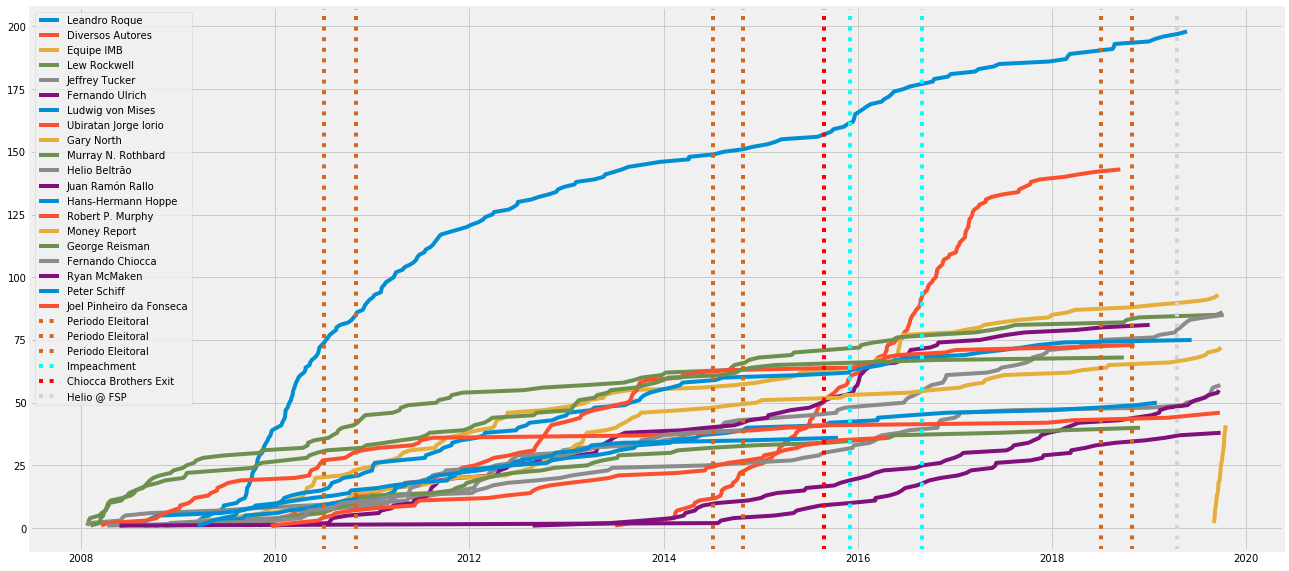

In [27]:
def get_authors_timeline(authors_list):
    # Timeline with all authors
    matplotlib.rc('figure', figsize=(20,10))
    for author in authors_list:
        df = df_author_ts[df_author_ts['author'] == author]
        df = df[['author', 'cumsum']]        
        plt.plot(df['cumsum'], label=author)
        plt.legend()
    get_all_milestone_events()
    plt.show()
    

get_authors_timeline(df_top_authors['author'].unique())

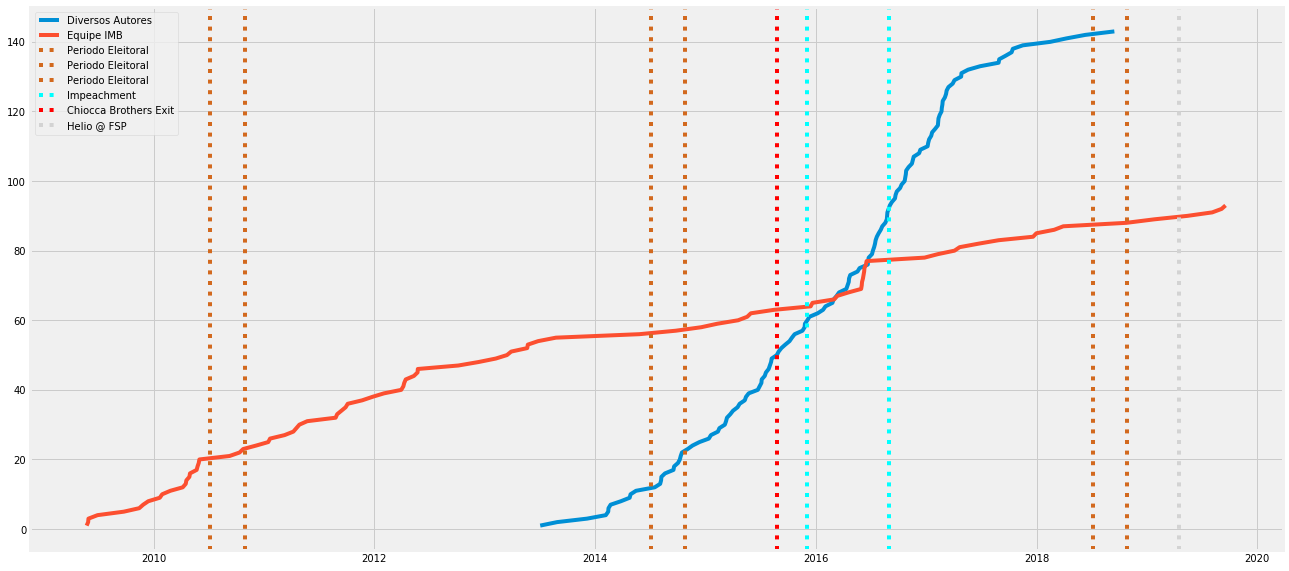

In [28]:
# Only meta accounts
get_authors_timeline(authors_imb)

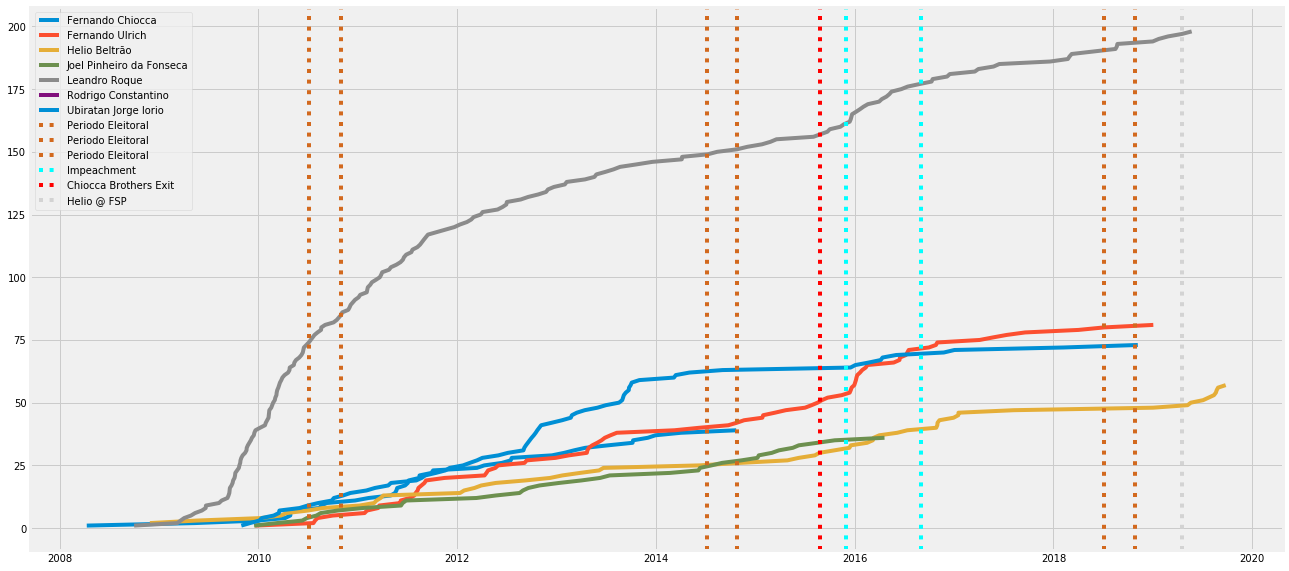

In [29]:
# All PT-BR authors
get_authors_timeline(authors_ptbr)

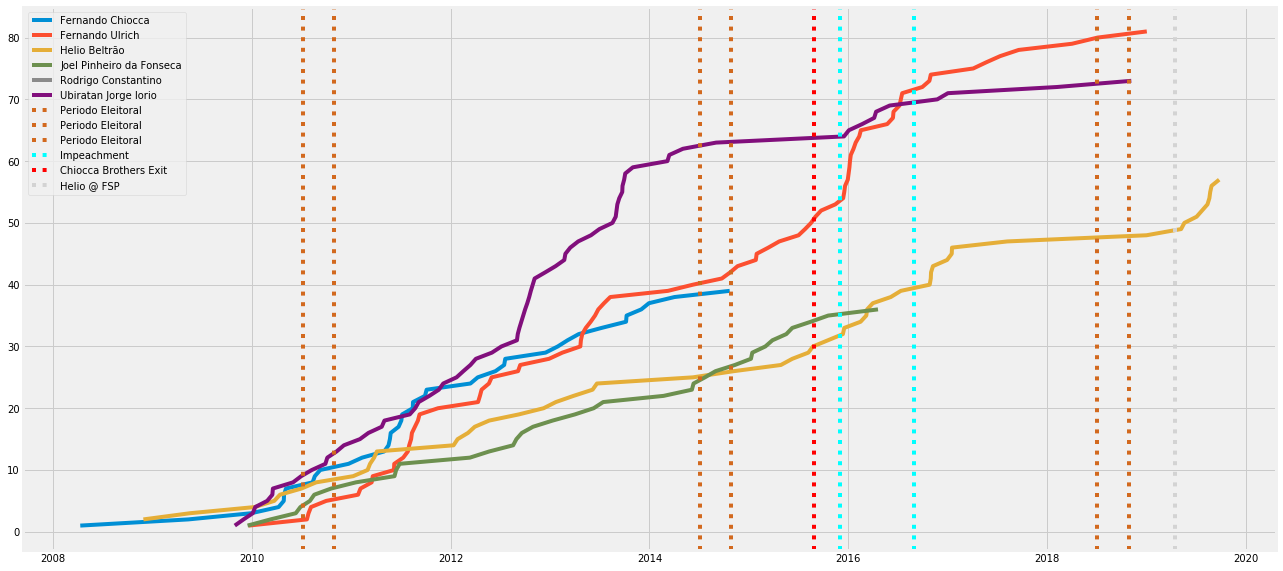

In [30]:
# Remove outlier (Leandro Roque)
get_authors_timeline(authors_no_roque)

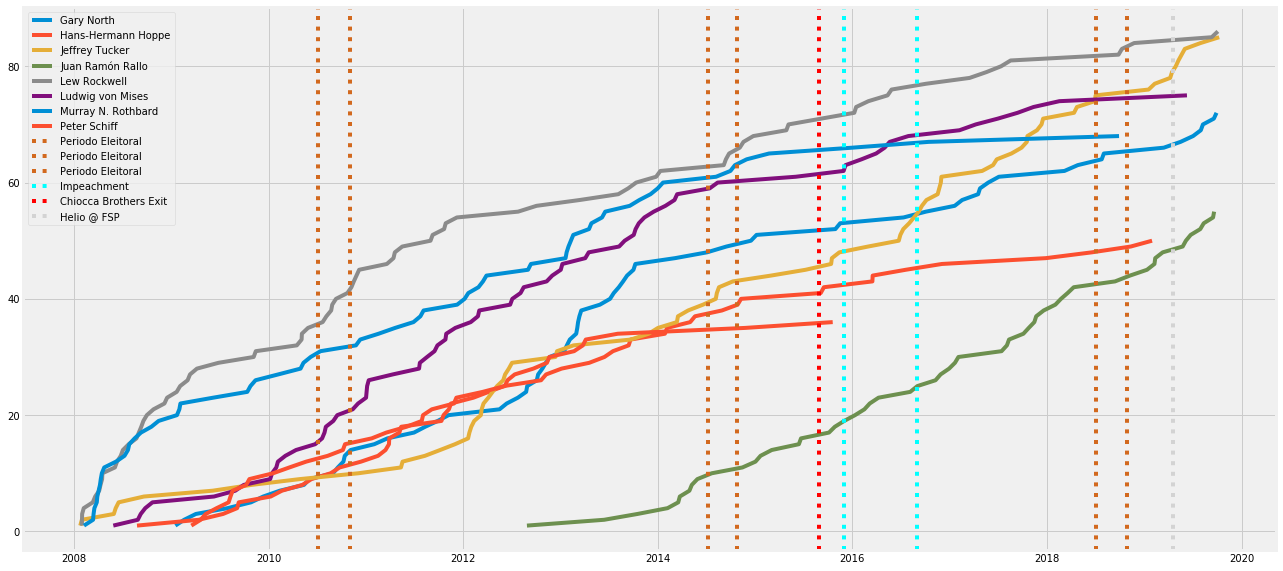

In [31]:
# EN authors
get_authors_timeline(authors_en)

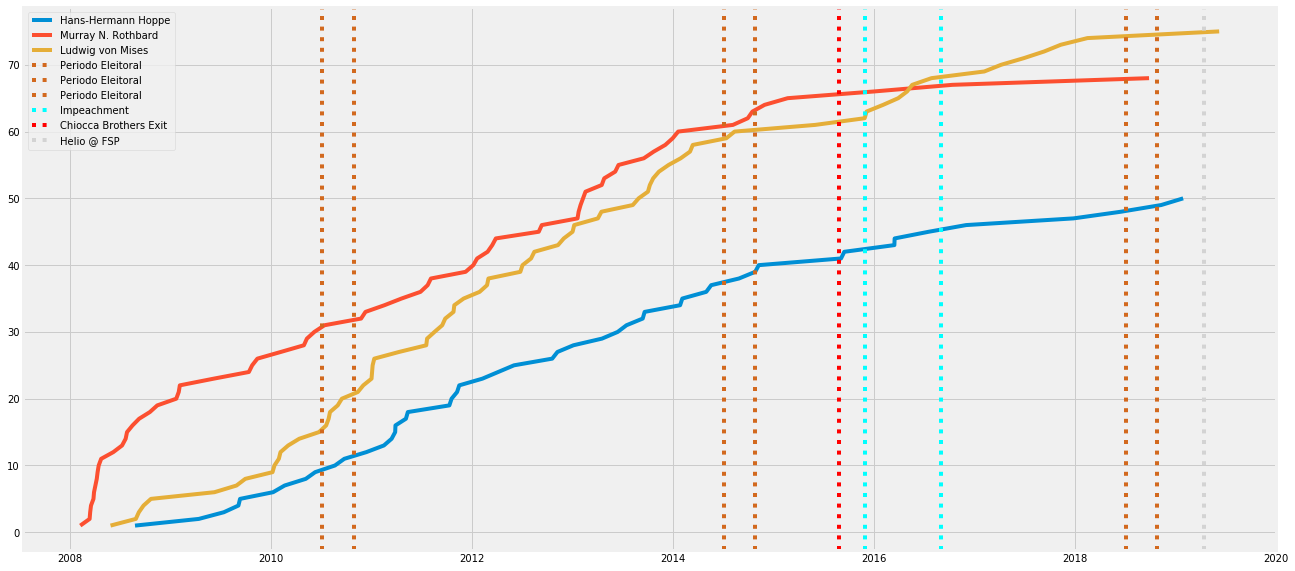

In [32]:
# Libertarians authors only
get_authors_timeline(authors_libertarians)

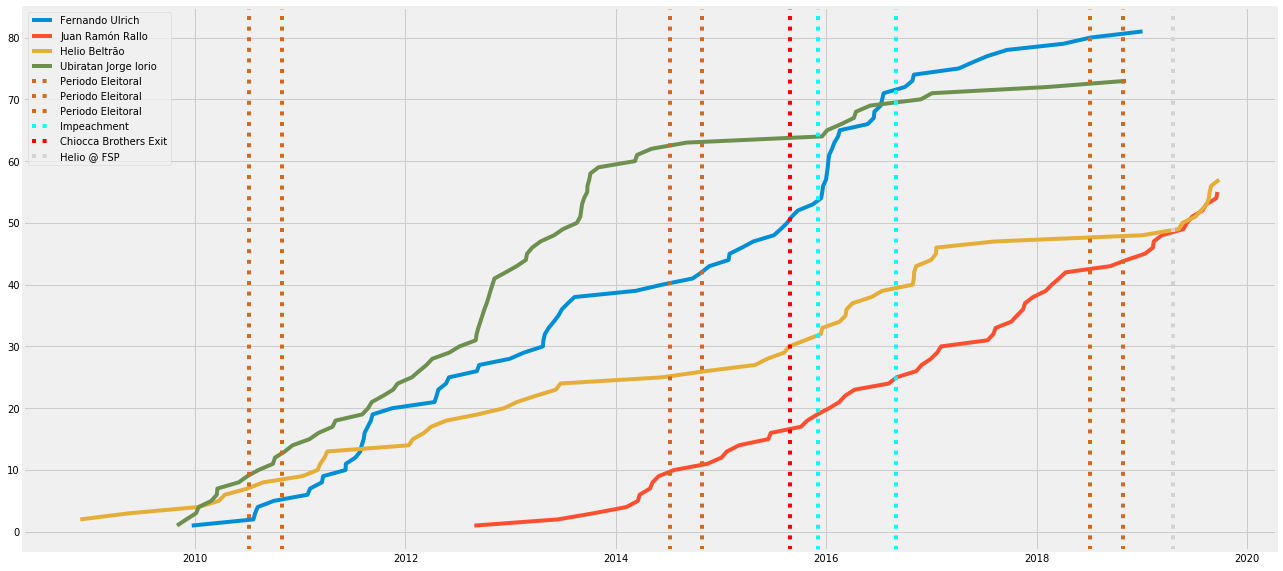

In [33]:
# Finance authors only
get_authors_timeline(authors_economics_finance)

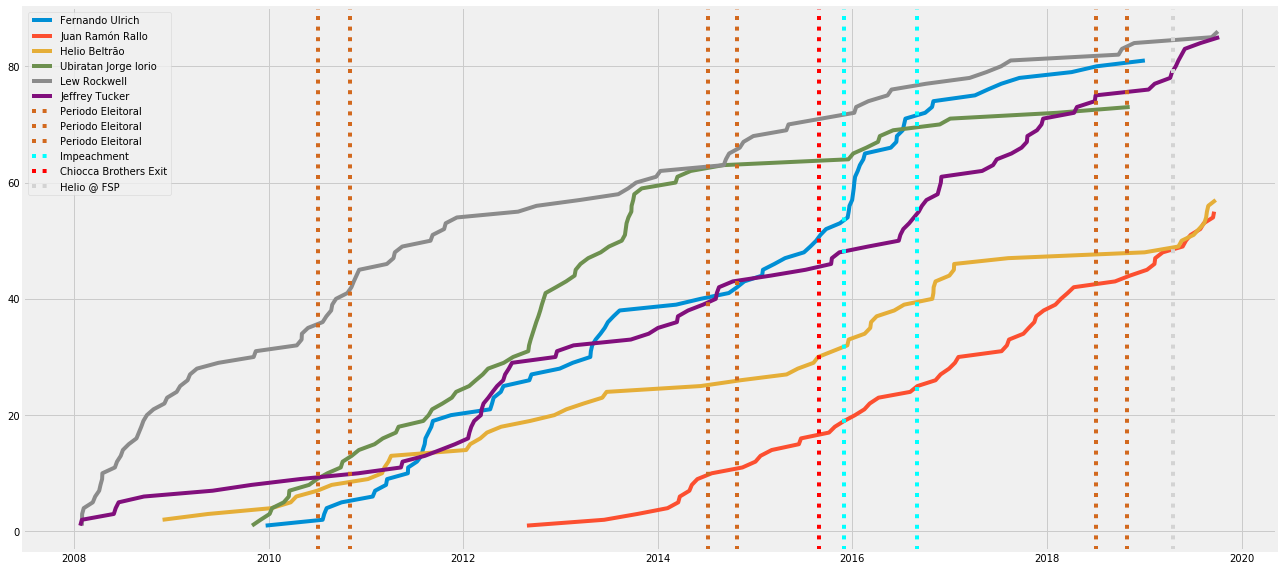

In [34]:
# Politics authors only
get_authors_timeline(authors_politics)

In [35]:
# References
# https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/